In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import seaborn as sns
from sklearn.cluster import KMeans  #导入kmeans
# from sklearn.utils import shuffle
import numpy as np
from skimage import io
import warnings

warnings.filterwarnings('ignore')

0.6117647

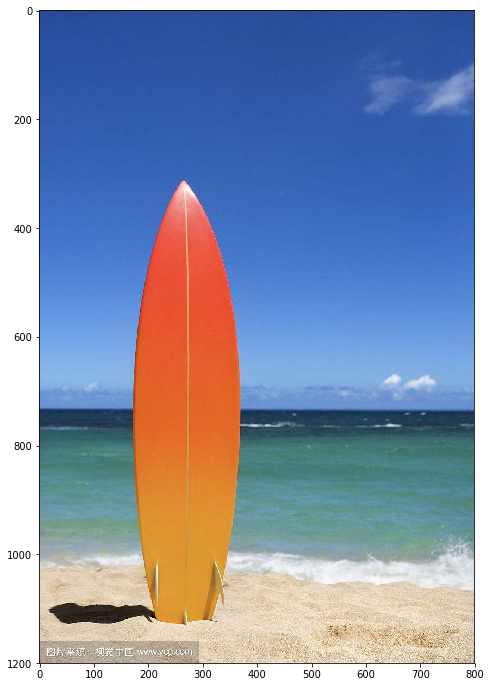

In [73]:
plt.figure(figsize=(20, 12))

# img_path = "/Users/zhouwencheng/Desktop/Grass/05 AI/05 jupyter/10 data/03 图片/02/Bing20180710.jpeg"
img_path = "/Users/zhouwencheng/Downloads/1055519-20171022204716615-1823017432.png"

img = mpig.imread(img_path)
plt.imshow(img)
img[1][203][2]


In [74]:
width,height,depth = img.shape
print(width)
print(height)
print(depth)
# temp = img.reshape(width*height,depth)
# temp = np.array(temp, dtype=np.float64) / 255

1200
800
4


In [75]:
temp = img.reshape(width*height,depth)
temp.shape

(960000, 4)

In [76]:
np.array(temp, dtype=np.float64) / 255
temp.shape

(960000, 4)

In [77]:
original_sample = shuffle(temp, random_state=0)[:1000] #随机取1000个RGB值作为训练集
original_sample.shape

(1000, 4)

In [78]:
def cluster(k):
    estimator = KMeans(n_clusters=k,n_jobs=8,random_state=0)#构造聚类器
    kmeans = estimator.fit(original_sample)#聚类   
    return kmeans

In [88]:
# RGB值转化为图像
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1 
    return image

In [89]:
kmeans = cluster(32)
labels = kmeans.predict(temp)
labels

array([16, 16, 16, ..., 10, 28,  3], dtype=int32)

In [90]:
labels.shape

(960000,)

In [91]:
kmeans.cluster_centers_.shape

(32, 4)

In [92]:
kmeans_32 = recreate_image(kmeans.cluster_centers_, labels,width,height)

0.616874635219574

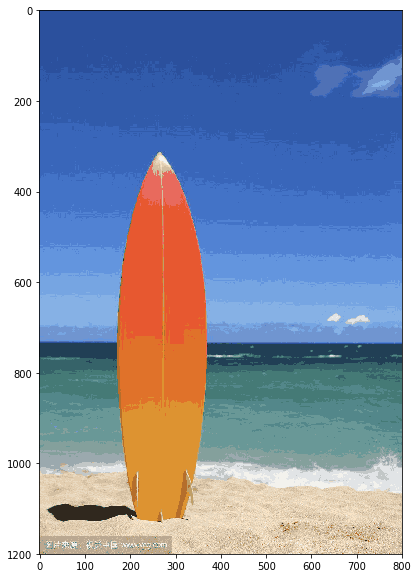

In [93]:
plt.figure(figsize=(18, 10)) 
plt.imshow(kmeans_32)
kmeans_32[1][203][2]

In [94]:
io.imsave('kmeans_32.png',kmeans_32)

In [97]:
kmeans1 = cluster(3)
labels1 = kmeans1.predict(temp)
kmeans_16 = recreate_image(kmeans1.cluster_centers_, labels1,width,height)

0.616874635219574

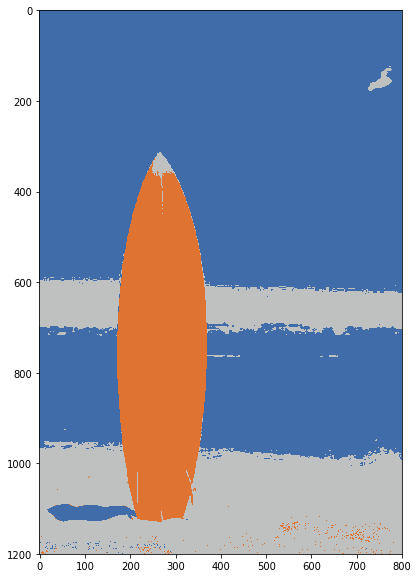

In [98]:
plt.figure(figsize=(18, 10)) 
plt.imshow(kmeans_16)
kmeans_32[1][203][2]

In [72]:
io.imsave('kmeans_16.png',kmeans_16)